<a href="https://colab.research.google.com/github/EdaOzgeUgurlu/python/blob/main/FinalCase1_AirlinePassengerSatisfactionDataset_EdaOzgeUgurlu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dosya Yükleme

In [ ]:
# Gerekli kütüphaneler
import pandas as pd             # Veri setini okuma, tablo gibi işlem yapma
import numpy as np              # Sayısal işlemler, istatistiksel hesaplamalar
import matplotlib.pyplot as plt # Grafik çizimi (histogram, boxplot, vs.)
import seaborn as sns           # Görselleştirmeleri daha estetik ve kolay yapmak için

In [ ]:
# Grafik ayarları
sns.set(style="whitegrid")               # Grafiklerin daha net görünmesi için
plt.rcParams["figure.figsize"] = (10,6)  # Grafiklerin daha büyük ve düzgün çıkması için

In [ ]:
# Dosyayı yükleme
from google.colab import files  # Colab'da dosya yüklemek için gerekli
uploaded = files.upload()       # Bilgisayarından dosya seçip yüklemeni sağlar

df = pd.read_csv("train.csv")   # CSV dosyasını Pandas ile yükler
                                # Yüklediğin dosyayı oku

df.head(8)  # İlk birkaç satırı görüntüle

Saving train.csv to train.csv


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied


#1. İstatistiksel Özet

In [ ]:
df.describe().T  # Sayısal değişkenler için istatistiksel özet

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [ ]:
df.median(numeric_only=True) # Median

,0
Unnamed: 0,51951.5
id,64856.5
Age,40.0
Flight Distance,843.0
Inflight wifi service,3.0
Departure/Arrival time convenient,3.0
Ease of Online booking,3.0
Gate location,3.0
Food and drink,3.0
Online boarding,3.0


# 2. Eksik Değer (Missing Value) Analizi

In [ ]:
missing_count = df.isnull().sum() # Her hücre için True (eksik) ya da False (dolu)
missing_percent = (missing_count / len(df)) * 100 # Eksik değer sayısını satır sayısına bölerek eksik oranını yüzde olarak hesaplama

missing_data = pd.DataFrame({
    "Eksik Değer Sayısı": missing_count,
    "Eksik Değer Oranı (%)": missing_percent
})

missing_data = missing_data[missing_data["Eksik Değer Sayısı"] > 0] # Gereksiz satırlar temizlenir.
missing_data.sort_values(by="Eksik Değer Oranı (%)", ascending=False) # Eksik değer oranına göre büyükten küçüğe sıralama


,Eksik Değer Sayısı,Eksik Değer Oranı (%)
Arrival Delay in Minutes,310,0.298352


In [ ]:
# Eksik verileri ortanca (median) ile doldur
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median())

# 3. Aykırı Değer (Outlier) Analizi


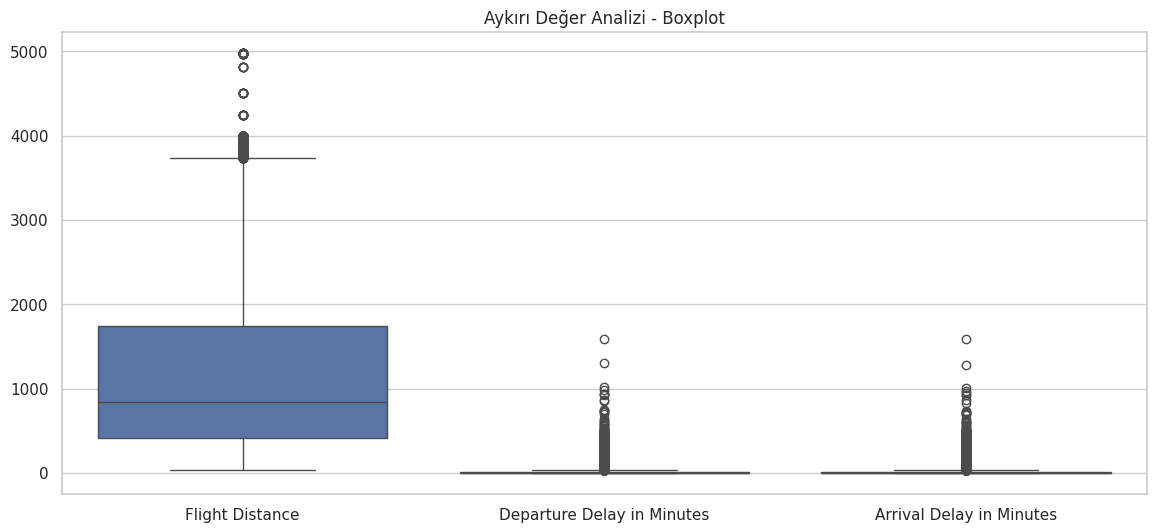

In [ ]:
# boxplot çizimi
plt.figure(figsize=(14,6)) # Grafik boyutu ayarlıyoruz. Genişlik 14, yükseklik 6
sns.boxplot(data=df[["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]]) # Görselleştirmek istenilen sütunlar
plt.title("Aykırı Değer Analizi - Boxplot") # Grafiğin başlığı atanır
plt.show() # Grafik çıktısı ekranda gösterir

In [ ]:
# Aykırı değerleri IQR (Interquartile Range - Çeyrekler Arası Aralık) yöntemiyle bulan fonksiyon
def detect_outliers_iqr(data, column):
    # 1. çeyrek değerini (Q1) hesapla - verinin alt %25'lik kısmı
    Q1 = data[column].quantile(0.25)
    # 3. çeyrek değerini (Q3) hesapla - verinin üst %25'lik kısmı
    Q3 = data[column].quantile(0.75)
    # Çeyrekler arası farkı (IQR = Q3 - Q1) hesapla
    IQR = Q3 - Q1
    # Alt ve üst sınır
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri tespit et: Alt sınırın altında veya üst sınırın üstünde olanlar
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    # Aykırı değerleri döndür
    return outliers


# "Flight Distance" sütunundaki aykırı değerleri tespit et
outliers_fd = detect_outliers_iqr(df, "Flight Distance")

# Tespit edilen aykırı değerlerin sayısını yazdır
print(f"Flight Distance sütununda {len(outliers_fd)} aykırı değer bulundu.")


Flight Distance sütununda 2291 aykırı değer bulundu.


#4. Veri Görselleştirme



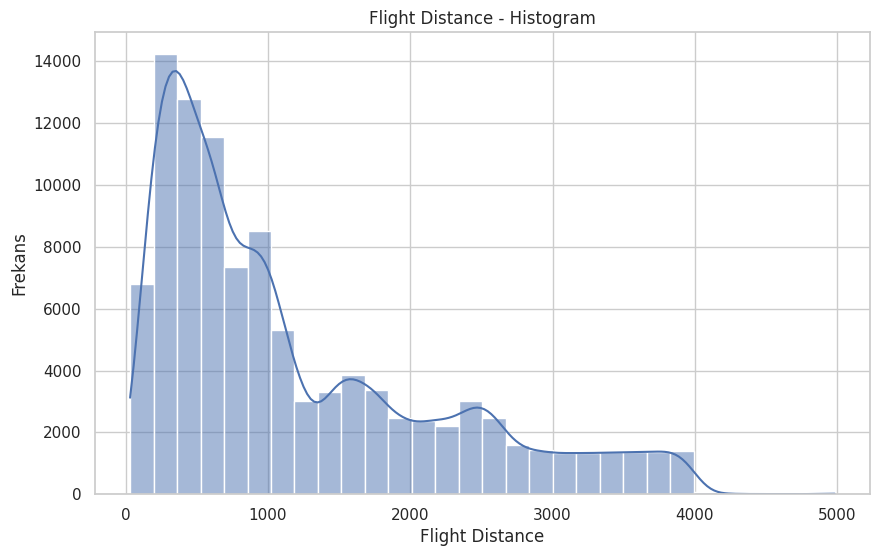

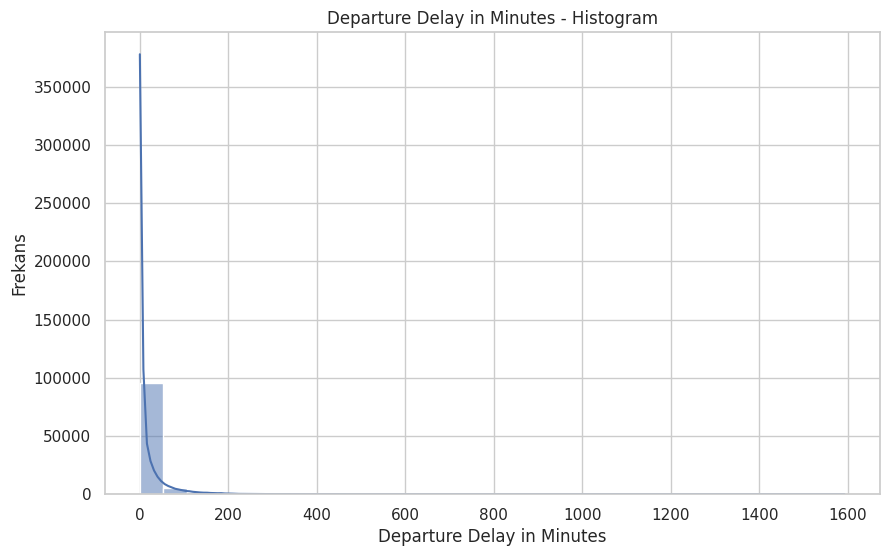

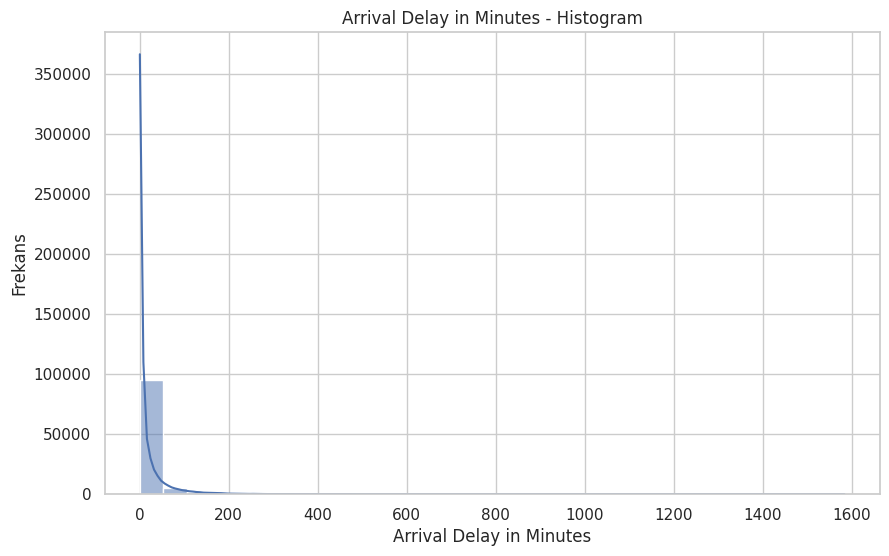

In [ ]:
# Sayısal değişkenleri içeren sütunları bir listeye atıyoruz
numeric_cols = ["Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)  # bins=30 → 30 aralıklı sütunlar
    plt.title(f"{col} - Histogram")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.show()


<ipython-input-14-4135117910>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


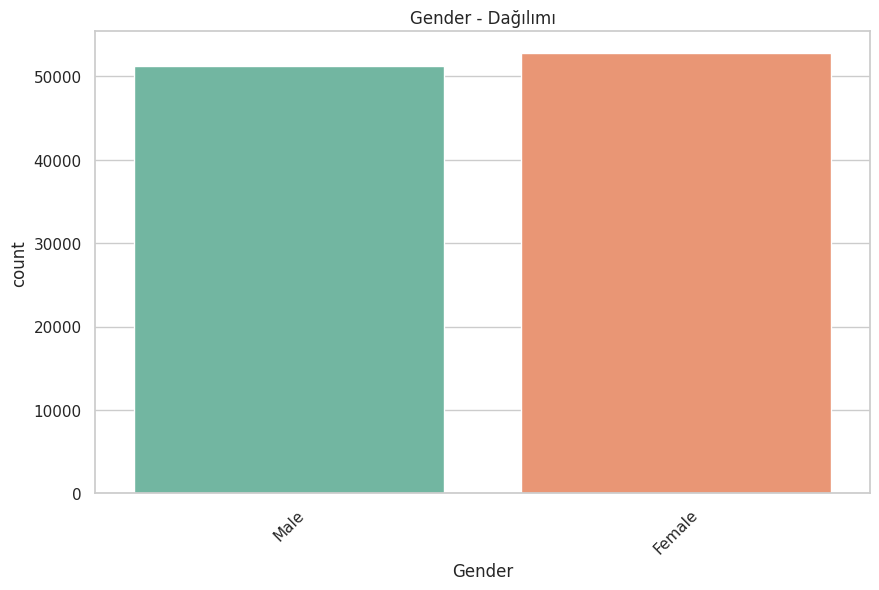

<ipython-input-14-4135117910>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


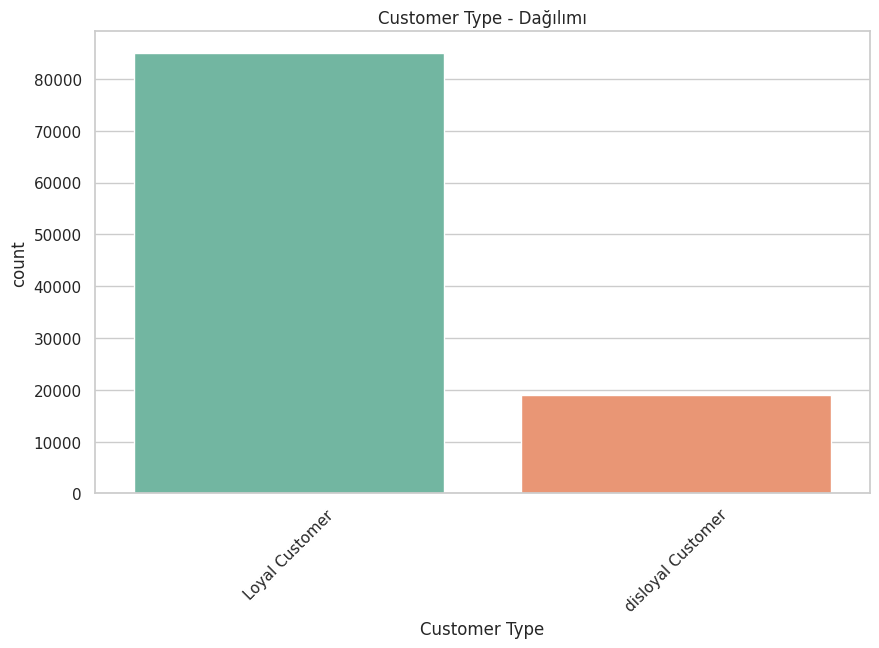

<ipython-input-14-4135117910>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


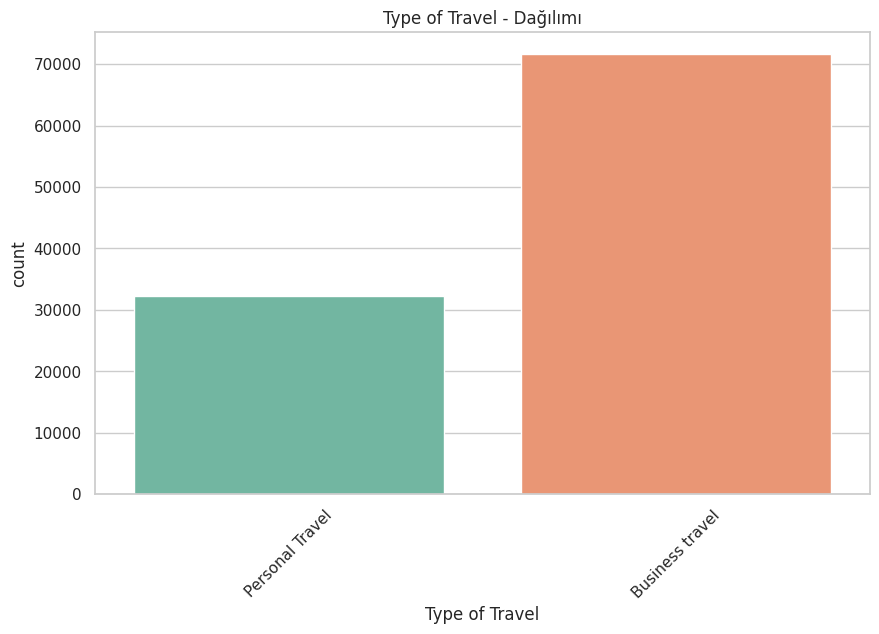

<ipython-input-14-4135117910>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


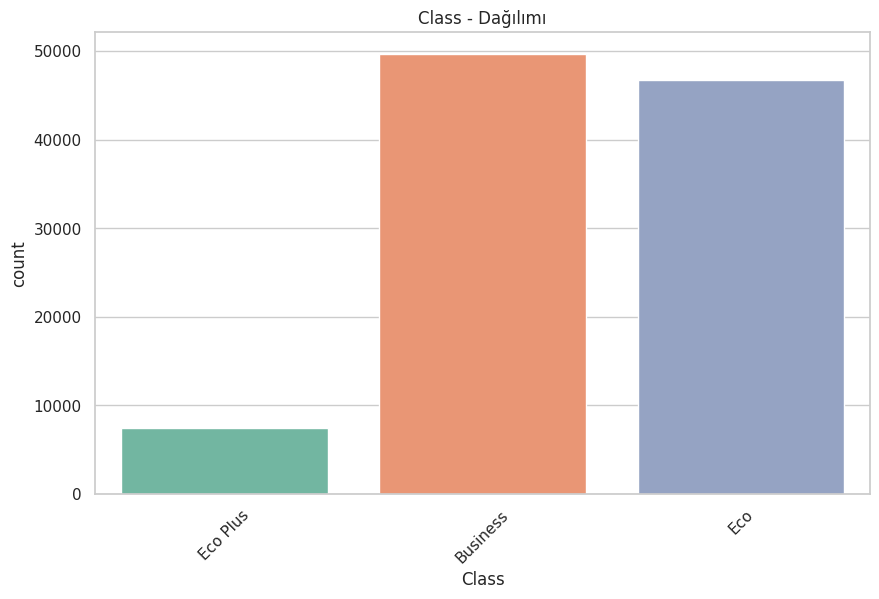

<ipython-input-14-4135117910>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


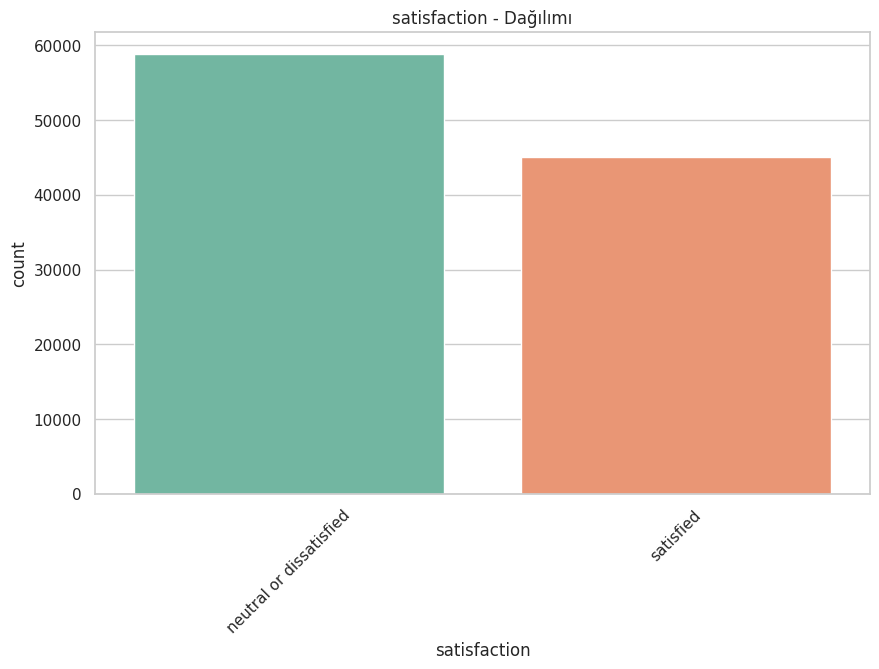

In [ ]:
# Kategorik değişkenler
categorical_cols = ["Gender", "Customer Type", "Type of Travel", "Class", "satisfaction"]

for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"{col} - Dağılımı")
    plt.xticks(rotation=45)
    plt.show()


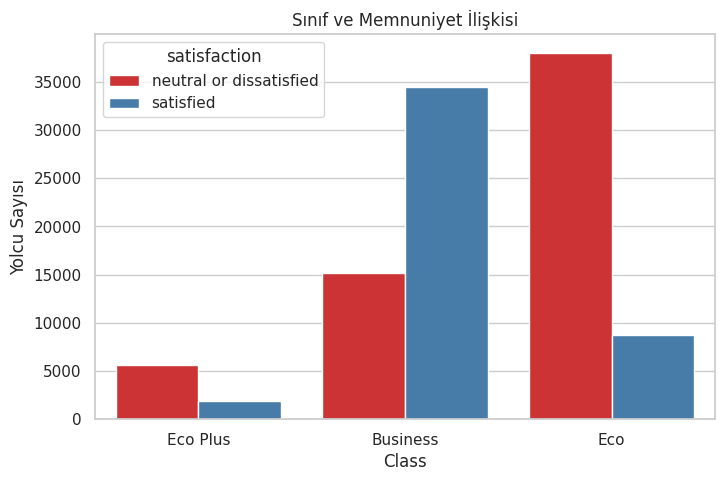

In [ ]:
plt.figure(figsize=(8, 5)) # Grafik boyutunu belirliyoruz (8 birim genişlik, 5 birim yükseklik)

sns.countplot(data=df, x="Class", hue="satisfaction", palette="Set1")
plt.title("Sınıf ve Memnuniyet İlişkisi") # Grafiğe başlık ekliyoruz
plt.ylabel("Yolcu Sayısı") # Y ekseni başlığını belirliyoruz
plt.show() # Grafiği ekrana çizdiriyoruz
